<a href="https://colab.research.google.com/github/Struth-Rourke/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Assignment_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these three values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [3]:
### Assignment Objective 1 ###


# Function that calculates Probability of Drunk Given Positive result

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  num = (prob_drunk_prior * true_positive_rate)
  denom = (prob_drunk_prior * true_positive_rate) + (false_positive_rate * (1 - prob_drunk_prior))
  bayes = num / denom
  return bayes

prob_drunk_given_positive(1/1000, .08, 1)

0.012357884330202669

In [4]:
# When you run the same function again, substituting the old prior for the new 
# probability (above output), you get the following probability associated with 
# being drunk when testing positive for being drunk twice

prob_drunk_given_positive(0.012357884330202669, .08, 1)

0.13525210993291495

In [21]:
# Recursion Algorithm: runs the function above multiple times until a probability
# value greater than or equal to .95 is given -- in this case 4 tests are necessary

drunk_probs = []
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  if prob_drunk_prior >= 0.95:
    return print(str('Done'))
  else:
    num = (prob_drunk_prior * true_positive_rate)
    denom = (prob_drunk_prior * true_positive_rate) + ((1 - prob_drunk_prior) * false_positive_rate)
    bayes = num / denom
    drunk_probs.append(bayes)
  return prob_drunk_given_positive(bayes, .08, 1)

prob_drunk_given_positive(1/1000, .08, 1)
print(lst)

Done
[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054]


In [22]:
### Assignment Objective 2 ###

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 22:56:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-03-18 22:56:41 (499 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [23]:
import pandas as pd
import numpy as np
from scipy import stats

names = ['party','handicapped-infants','water-project',
         'budget','physician-fee-freeze', 'el-salvador-aid',
         'religious-groups','anti-satellite-ban',
         'aid-to-contras','mx-missile','immigration',
         'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

df = pd.read_csv('house-votes-84.data', names = names)
df = df.replace({'y':1, 'n':0, '?':np.NaN})

print(df.shape)
print('.....')

print(df['party'].value_counts())
print('.....')

df.head()

(435, 17)
.....
democrat      267
republican    168
Name: party, dtype: int64
.....


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
# Confidence Interval

def confidence_interval(data, confidence = .95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # Extra paramter (ddof) to calculate sample standard deviation
  s = data.std(ddof = 1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [110]:
# Democrats via Hand CI

hand_CI = confidence_interval(dem['water-project'].dropna())

print(lower)
print(mean)
print(upper)

print('.....')

print('Margin of Error = ' + str(mean - lower))

0.43824514095228484
0.502092050209205
0.5659389594661252
.....
Margin of Error = 0.06384690925692016


In [111]:
hand_CI

(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

In [112]:
# Democrats via Bayes CI

mean_CI, _, _, = stats.bayes_mvs(dem['water-project'].dropna(), alpha = .95)
bayes_CI = list(mean_CI)
bayes_CI[1:2] = 0.43824514095228484, 0.5659389594661252
bayes_CI = tuple(bayes_CI)
bayes_CI

(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

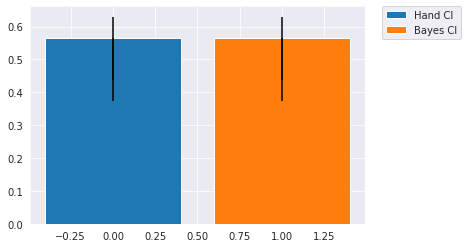

In [131]:
# Confidence Interval Graph

import matplotlib.pyplot as plt

labels = ['Hand CI', 'Bayes CI']

fig, ax = plt.subplots()
ax.bar(0, hand_CI, yerr = 0.06384690925692016)
ax.bar(1, bayes_CI, yerr = 0.06384690925692016)
ax.legend(labels, bbox_to_anchor=(1.05, 1), loc = 'upper left', borderaxespad=0.)
plt.show()



## Assignment Objective 3

The major difference between Bayesian and Frequentist Statistics comes down to the use of a subjective prior event as a baseline for calculating future probabilities for a given range of events.

**Frequentist Statistics** is rooted in the idea that a probability for a given event is true, and that any probabilities derived are a sample of the larger dataset. For example, if there is a population, and a sample set is created, the observed probabilities of that sample are representative of the whole defined population. It hinges on the idea of 'likelihood,' and on specific, or conditional events. The likelihood of an event is synonymous with probability when looking at it from a frequentist perspective. A good way of illustrating this is with die rolling; there is a 1/6 chance of rolling a six on any one occasion because there are only six values that could possibly come up.

**Bayesian Statistics** is rooted in the idea that there is some prior hypothesis that speculates a given probability for a specific event, and that subsequent instances, or non-instances, of that event over time change the overall probability associated with that event. For example, there may be a given theory about the probability of stock market crashes greater than 20% over a 10 year period. As instances occur over those 10 years, the probability of crashes greater than 20% will be revised to better reflect the probability that event will occur again. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!